In [1]:
#!pip install -Uqq fastai 'duckduckgo_search>=6.2'
#!pip install fastbook
import fastbook
fastbook.setup_book()

from fastbook import *
from fastai.vision.widgets import *

import socket,warnings
try:
    socket.setdefaulttimeout(1)
    socket.socket(socket.AF_INET, socket.SOCK_STREAM).connect(('1.1.1.1', 53))
except socket.error as ex: raise Exception("STOP: No internet. Click '>|' in top right and set 'Internet' switch to on")

# It's a good idea to ensure you're running the latest version of any libraries you need.
# `!pip install -Uqq <libraries>` upgrades to the latest version of <libraries>
# NB: You can safely ignore any warnings or errors pip spits out about running as root or incompatibilities
import os
iskaggle = os.environ.get('KAGGLE_KERNEL_RUN_TYPE', '')

if iskaggle:
    !pip install -Uqq fastai 'duckduckgo_search>=6.2'

In [2]:
##The most common bird in NYC is the "European_Starling". While "pigeon" and "house_sparrow" are also
##very common.Other common birds in NYC include American Robins, Mourning Doves, Blue Jays, and Red-winged Blackbirds.

##1. set up function using DDG library for searching images
from duckduckgo_search import DDGS
from fastcore.all import *

def search_images(keywords, max_images=200): return L(DDGS().images(keywords, max_results=max_images)).itemgot('image')
import time, json

In [3]:
##2. download birds images
bird_types = 'european starling','pigeon','house sparrow', 'american robins', 'blue jays', 'red-winged blackbirds', 'mourning dove'
path = Path('birds')

if not path.exists():
    path.mkdir()
    for o in bird_types:
        dest = (path/o)
        dest.mkdir(exist_ok=True)
        results = search_images(f'{o} birds')
        download_images(dest, urls=results)

In [4]:
%ls

birds/  trainbirds.ipynb*


In [5]:
finds = get_image_files(path)
finds

(#1236) [Path('birds/american robins/0273e8b5-4376-4a89-9bbc-3f1da6c2fc65.jpg'),Path('birds/american robins/03c6b2e1-e20a-4702-a2d3-ed3ac7608647.jpg'),Path('birds/american robins/05ba308d-24d7-416f-aa5d-c31ced370f30.jpg'),Path('birds/american robins/0a3f1e2c-72b1-46bc-ad21-b6a7abb659dd.JPG'),Path('birds/american robins/0a9287c0-6b28-4498-9a88-5f874db39a0c.jpg'),Path('birds/american robins/0b245784-c2ee-414e-8585-9500dcd217bd.png'),Path('birds/american robins/0b298872-5d06-4c71-ba30-b66c20fa30fc.png'),Path('birds/american robins/0cf0255a-cfe5-4b91-ae2d-81095c8653ce.jpg'),Path('birds/american robins/0d801e3c-ec84-45a3-80b7-c47cfdb4ad44.png'),Path('birds/american robins/0dac943c-e2e3-48fb-ab47-87eb1eabfa9c.jpg'),Path('birds/american robins/0ed40d0d-a7ee-475f-b0b3-ad19cc0f3acb.jpg'),Path('birds/american robins/0ef72b4c-0179-4073-b8e2-e5a96f9a49a7.jpg'),Path('birds/american robins/0f34f5af-1856-4a47-9677-54d8826c220c.jpg'),Path('birds/american robins/108d8d1b-b247-4abc-bdca-9ffec5ced25e.jpg

In [6]:
from collections import Counter
print(Counter([parent_label(f) for f in get_image_files(path)]))

Counter({'pigeon': 183, 'blue jays': 180, 'mourning dove': 180, 'american robins': 177, 'house sparrow': 176, 'european starling': 174, 'red-winged blackbirds': 166})


In [7]:
#clean the download images
failed = verify_images(finds)
failed

(#0) []

In [8]:
#remove those bad images
failed.map(Path.unlink);

In [9]:
#set up architecture and pass through "dataloaders" function
birds = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))
birddl = birds.dataloaders(path)

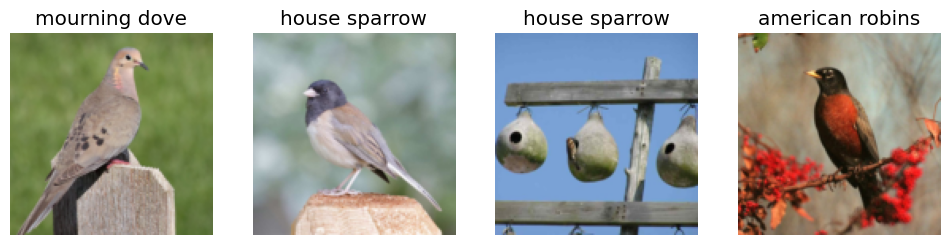

In [10]:
birddl.valid.show_batch(max_n=4, nrows=1)

In [11]:
#data augementation
birds = birds.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
birddl = birds.dataloaders(path)

In [12]:
from fastai.vision.all import *
import timm
from timm import list_models

list_models("convnext_tiny*")  # Optional: check available ConvNeXt variants

learn = vision_learner(birddl, 'convnext_tiny', metrics=error_rate)
learn.fine_tune(10)

model.safetensors:   0%|          | 0.00/114M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,1.156694,0.272670,0.076923,00:10


/home/duenshianwang/yes/envs/fastai-env/lib/python3.10/site-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/duenshianwang/yes/envs/fastai-env/lib/python3.10/site-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/duenshianwang/yes/envs/fastai-env/lib/python3.10/site-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/duenshianwang/yes/envs/fastai-env/lib/python3.10/site-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/duenshianwang/yes/envs/fastai-env/lib/python3.10/site-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA

epoch,train_loss,valid_loss,error_rate,time
0,0.254715,0.196047,0.056680,00:12
1,0.190038,0.142988,0.044534,00:12
2,0.169575,0.185768,0.044534,00:12
3,0.145019,0.116724,0.036437,00:12
4,0.122887,0.126910,0.032389,00:12
5,0.105135,0.123218,0.040486,00:12
6,0.089170,0.123254,0.036437,00:12
7,0.071133,0.122586,0.028340,00:12
8,0.060909,0.125806,0.028340,00:12
9,0.056497,0.124097,0.028340,00:12


/home/duenshianwang/yes/envs/fastai-env/lib/python3.10/site-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/duenshianwang/yes/envs/fastai-env/lib/python3.10/site-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/duenshianwang/yes/envs/fastai-env/lib/python3.10/site-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/duenshianwang/yes/envs/fastai-env/lib/python3.10/site-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/duenshianwang/yes/envs/fastai-env/lib/python3.10/site-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA

/home/duenshianwang/yes/envs/fastai-env/lib/python3.10/site-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/duenshianwang/yes/envs/fastai-env/lib/python3.10/site-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/duenshianwang/yes/envs/fastai-env/lib/python3.10/site-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/duenshianwang/yes/envs/fastai-env/lib/python3.10/site-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/duenshianwang/yes/envs/fastai-env/lib/python3.10/site-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA

<Axes: title={'center': 'learning curve'}, xlabel='steps', ylabel='loss'>

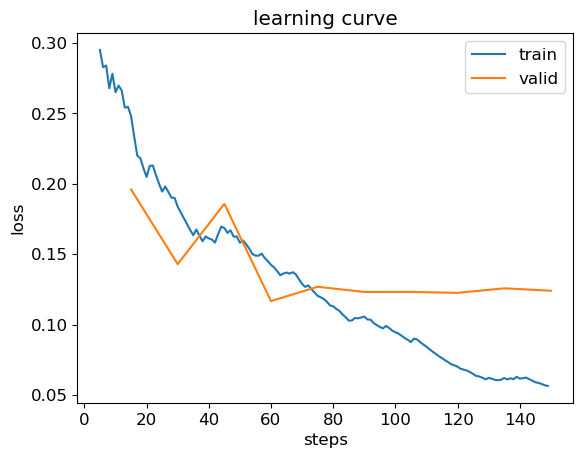

In [13]:
learn.recorder.plot_loss()

/home/duenshianwang/yes/envs/fastai-env/lib/python3.10/site-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/duenshianwang/yes/envs/fastai-env/lib/python3.10/site-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/duenshianwang/yes/envs/fastai-env/lib/python3.10/site-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


/home/duenshianwang/yes/envs/fastai-env/lib/python3.10/site-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/duenshianwang/yes/envs/fastai-env/lib/python3.10/site-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/duenshianwang/yes/envs/fastai-env/lib/python3.10/site-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


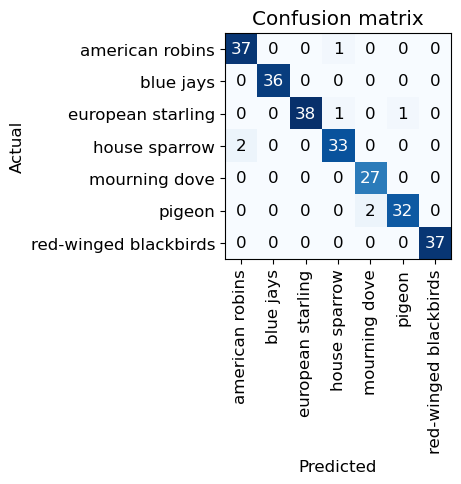

In [14]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

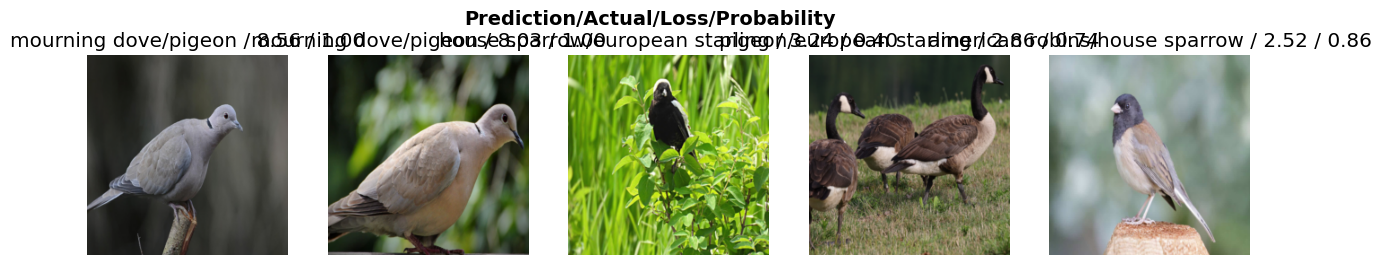

In [15]:
interp.plot_top_losses(5, nrows=1)

In [16]:
#hide_output
from fastai.vision.widgets import ImageClassifierCleaner
cleaner = ImageClassifierCleaner(learn)
cleaner

/home/duenshianwang/yes/envs/fastai-env/lib/python3.10/site-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/duenshianwang/yes/envs/fastai-env/lib/python3.10/site-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/duenshianwang/yes/envs/fastai-env/lib/python3.10/site-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


/home/duenshianwang/yes/envs/fastai-env/lib/python3.10/site-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/duenshianwang/yes/envs/fastai-env/lib/python3.10/site-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/duenshianwang/yes/envs/fastai-env/lib/python3.10/site-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [17]:
#export model
learn.export('birddl.pkl')